In [1]:
#Importing needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the file

df = pd.read_csv("application_data.csv")

In [3]:
#checking the shape of the file

df.shape

(307511, 122)

In [4]:
#Checking the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#Checking null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
#Percentage of null values

df.isnull().sum()/100

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     415.19
AMT_REQ_CREDIT_BUREAU_WEEK    415.19
AMT_REQ_CREDIT_BUREAU_MON     415.19
AMT_REQ_CREDIT_BUREAU_QRT     415.19
AMT_REQ_CREDIT_BUREAU_YEAR    415.19
Length: 122, dtype: float64

In [7]:
#dropping columns which has more than 30% of null values

nullcol = df.isnull().sum()
nullcol = nullcol[nullcol.values>(0.3*(df.shape[0]))]


In [8]:
#cheking the number of  columns that are to be deleted

len(nullcol)

50

In [9]:
#Dropping the null value columns that has more than 30% ofthe total 

df.drop(nullcol.index,axis =1 ,inplace = True)

In [10]:
#Rechecking the columns and its null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 72, dtype: int64

In [11]:
#dropping columns that are uneccessary and has more null values.

tdf = df.isnull().sum()


In [12]:
# dropping null columns more than 13%

df.drop(tdf[tdf.values>39976].index,axis =1, inplace = True)


In [13]:
df["AMT_ANNUITY"].value_counts() 

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [14]:
#Rechecking the columns for the null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
#Dropping all the unecessary columns for analysis

del_col = ["NAME_TYPE_SUITE","EXT_SOURCE_2", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE", 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


df.drop(del_col, axis = 1, inplace= True)

In [16]:
#Checking the length of the columns that are to be dropped from the data frame

len(del_col )

39

In [17]:
#Recheking the data frame after the drop of unecessary columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [18]:
#Imputing the values of null

df["AMT_GOODS_PRICE"].fillna(round(df["AMT_GOODS_PRICE"].mean()), inplace =True)

In [19]:
#Count of values for the different variables

df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [20]:
#inspecting the values of the columns

df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [22]:
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [23]:
df["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [24]:
df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [25]:
#since there is only 4 instances of XNA, it is being taken as wrong value and is being imputed 

df["CODE_GENDER"]= df["CODE_GENDER"].apply(lambda x : "F" if x == "XNA" else x)

In [26]:
# droping all the rows which has XNA in the organitation type 

df = df[~(df.ORGANIZATION_TYPE == "XNA")]


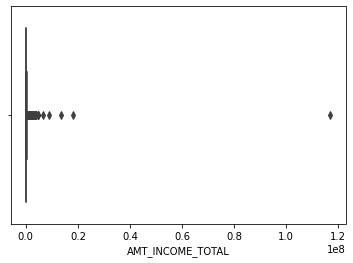

In [27]:
#Plotting income total distribution

sns.boxplot(df["AMT_INCOME_TOTAL"])

inference:

In [28]:
#binning the income total variable

df.loc[:,'INCOME_GROUP']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.25,0.50,0.95,1],
labels=["Very_low",'Low','Medium','High','Very_high'])

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,MONDAY,11,0,0,0,0,0,0,School,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,MONDAY,9,0,0,0,0,0,0,Government,Very_low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,THURSDAY,11,0,0,0,0,1,1,Religion,Medium


In [29]:
#checking the distribution of income in different levels

df["INCOME_GROUP"].value_counts()

High         97516
Medium       68798
Very_low     39502
Low          33714
Very_high    12607
Name: INCOME_GROUP, dtype: int64

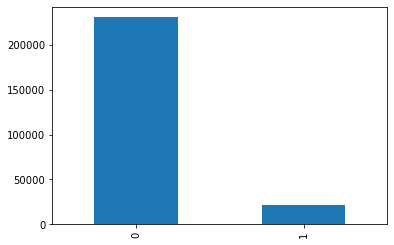

In [30]:
#checking imbalance

df["TARGET"].value_counts().plot.bar()

inference:

In [31]:
#creating age column as the days_birth column is not feasible 

df["AGE"]= df["DAYS_BIRTH"]//-365

In [32]:
#binning age into age groups

bins = []
for i in range(20, 80,5):
    bins.append(i)
    
label = ["20-25", "25-30", "30-35", "35-40", "40-45","45-50", "50-55","55-60", "60-65", "65-75", "75-80"]

df["AGE_GROUP"]= pd.cut(df.AGE,bins = bins, labels = label)

In [33]:
#splitting the main data frame into two based on target

t1 = df[df["TARGET"]== 1]  #for defaulters
t0 = df[df["TARGET"]== 0]  #for non-defaulters

### Univariate Analysis

In [34]:
#defining a function for plotting bar charts for univariate analysis

def plot(col, h = None):
    fig, axes= plt.subplots( 1,  2, figsize= (10,5))
    
    a= sns.countplot(col,data =t0, palette = "magma",ax= axes[0])
    a.set_title(h + " distribution for Non-Defaulters",fontsize= 10)
    plt.setp(a.xaxis.get_majorticklabels(),rotation= 90)
    
    b= sns.countplot(col,data =t1, palette = "magma",ax= axes[1])
    b.set_title(h + " distribution for Defaulters",fontsize= 10)
    plt.setp(b.xaxis.get_majorticklabels(),rotation= 90)
    
    plt.tight_layout()

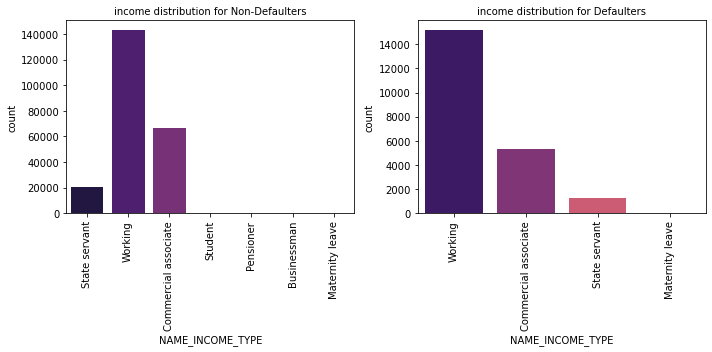

In [35]:
#Plotting for various columns wise distribution

plot("NAME_INCOME_TYPE", "income")

inference: working and commmercial type are the majority population in both the cases and hence they seek for more no of loans 
although bank may focus on working and commercial associate types

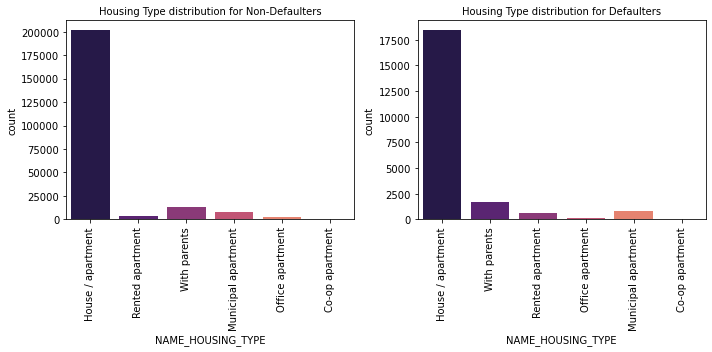

In [36]:
plot("NAME_HOUSING_TYPE","Housing Type")

inference: house/apartment, with parents are majority loan seekers, co-op are the least no of loan seekers

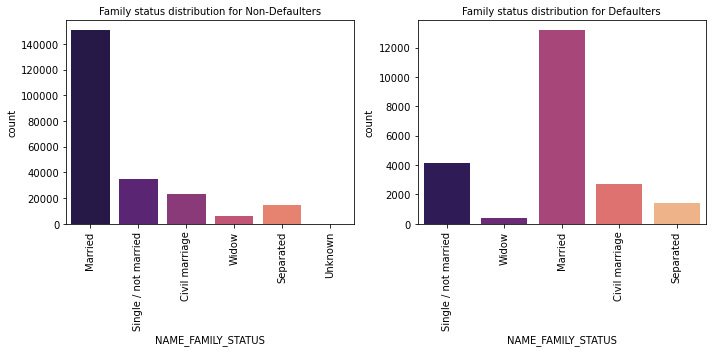

In [37]:
plot("NAME_FAMILY_STATUS", "Family status")

inference: single , married population are the two categories who tends to take loans on majority

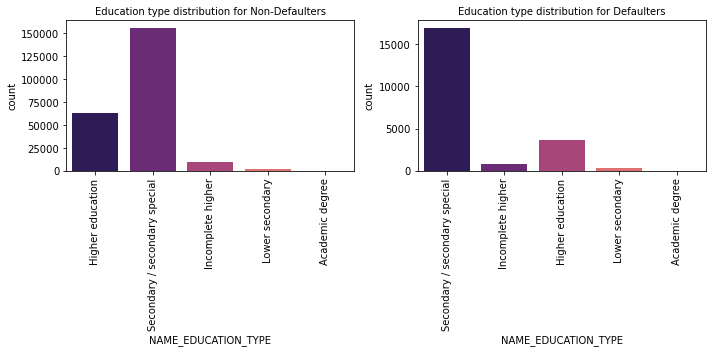

In [38]:
plot("NAME_EDUCATION_TYPE", "Education type")

inference: secondary/secondary special is the the majority loan takers and the least loan takers are from academic degree

In [39]:
# function for plotting countinous variable  

def plot_c(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    
    sns.distplot(t0[col], hist= False)
    #t0[col].plot.hist(color= "seagreen")
    plt.title('Distribution for Non-Defaulters')
    plt.xlabel(col)
    
    plt.subplot(1, 2, 2)
    
    sns.distplot(t1[col], hist= False)
    #t1[col].plot.hist(color= "seagreen")
    plt.title('Distribution for Defaulters')
    plt.xlabel(col)
        
    plt.show()
    plt.tight_layout()

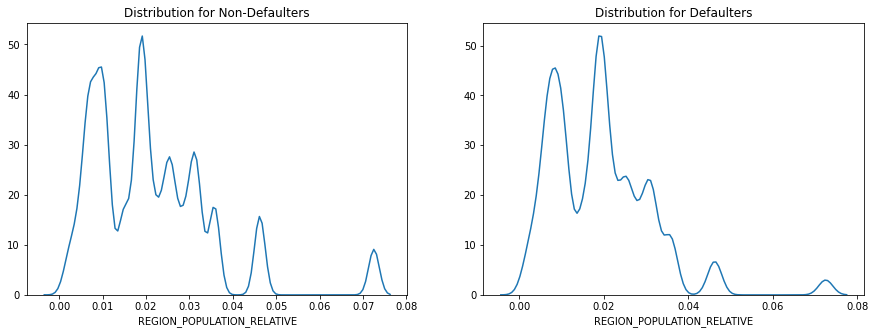

<Figure size 432x288 with 0 Axes>

In [40]:
plot_c("REGION_POPULATION_RELATIVE")

inference: The graphs are skewed to the left and this also states that most of the population stays in less populated area

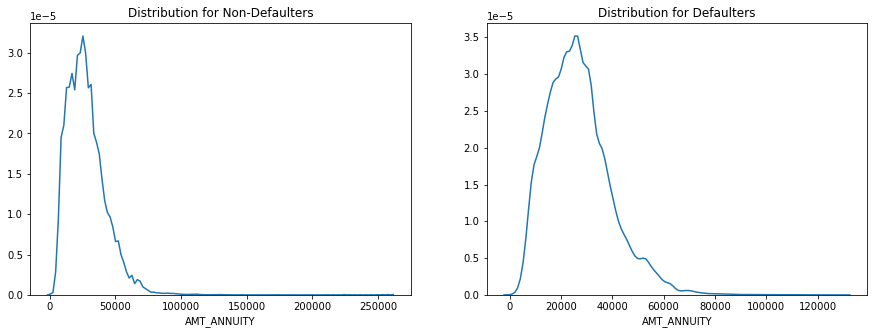

<Figure size 432x288 with 0 Axes>

In [41]:
plot_c("AMT_ANNUITY")    #not needed

inference: majority loan takers are paying in the interval of 0-50000 in both thee cases. 

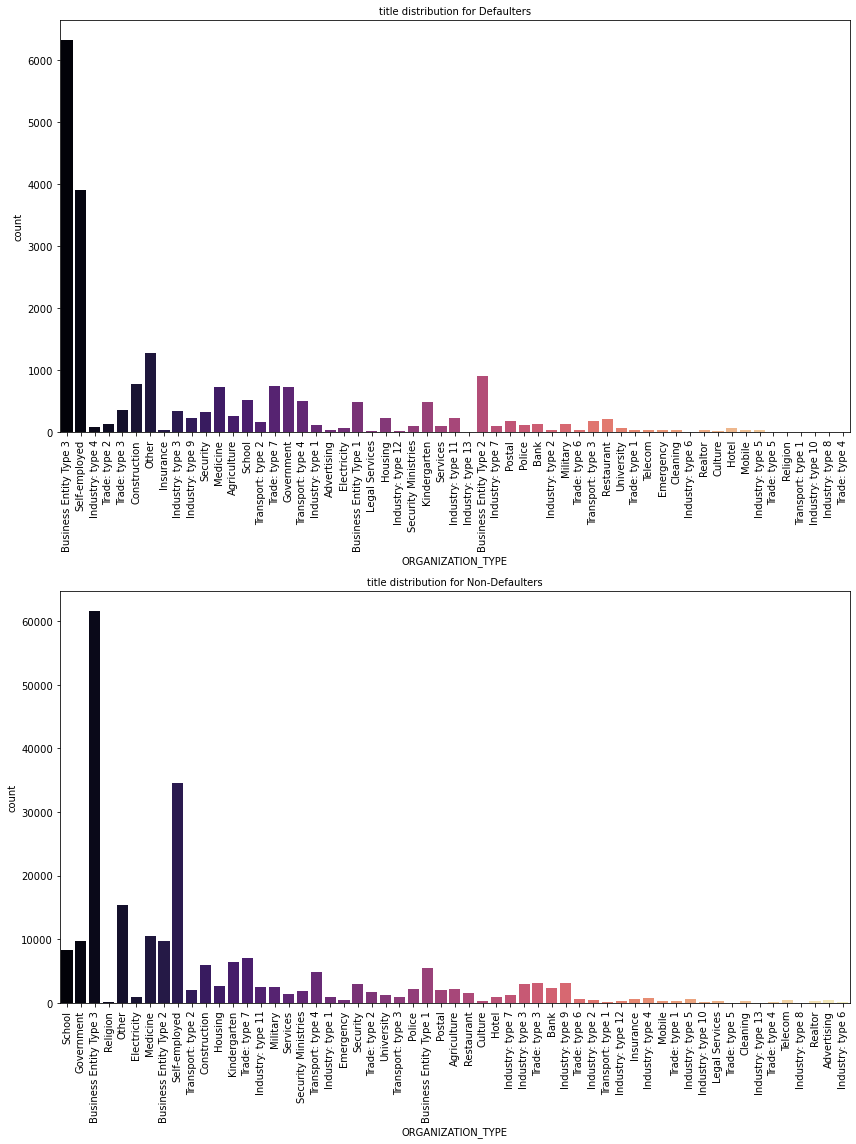

In [42]:
# univariate analysis for organisation type

fig, axes= plt.subplots( 2,  1, figsize= (12,16))
heading= "title"
    
a= sns.countplot(x ="ORGANIZATION_TYPE",data =t1, palette = "magma",ax= axes[0])
a.set_title(heading + " distribution for Defaulters",fontsize= 10)
plt.setp(a.xaxis.get_majorticklabels(),rotation= 90)
   
b= sns.countplot(x ="ORGANIZATION_TYPE",data =t0, palette = "magma",ax= axes[1])
b.set_title(heading + " distribution for Non-Defaulters",fontsize= 10)
plt.setp(b.xaxis.get_majorticklabels(),rotation= 90)
    
plt.tight_layout()

inference:business entity type-3 and self employed are two major types in both cases and business entity type-1 and business entity type-2 are far lesser loan takers compared to business entity type-3. 

### Bivariate and Multivariate analysis

In [43]:
#defining function for barplots

def barpl(col, h):
    fig, axes= plt.subplots( 1,  2, figsize= (12,5))
    
    a= sns.countplot(col, hue=h, data =t0, palette = "magma",ax= axes[0])
    a.set_title( "distribution for Non-Defaulters",fontsize= 10)
    a.legend(loc ="upper right", title = h)
    plt.setp(a.xaxis.get_majorticklabels(),rotation= 90)
    
    b= sns.countplot(col, hue= h, data =t1, palette = "magma",ax= axes[1])
    b.set_title( "distribution for Defaulters",fontsize= 10)
    b.legend(loc ="upper right", title = h)
    plt.setp(b.xaxis.get_majorticklabels(),rotation= 90)
    
    plt.tight_layout()

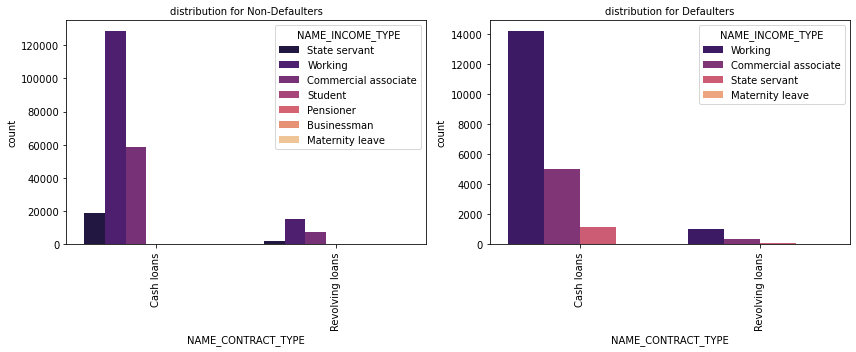

In [44]:
#Analysing two or more columns

barpl("NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE")

inference: working, commercial associate are the two major loan takers in form of cash 

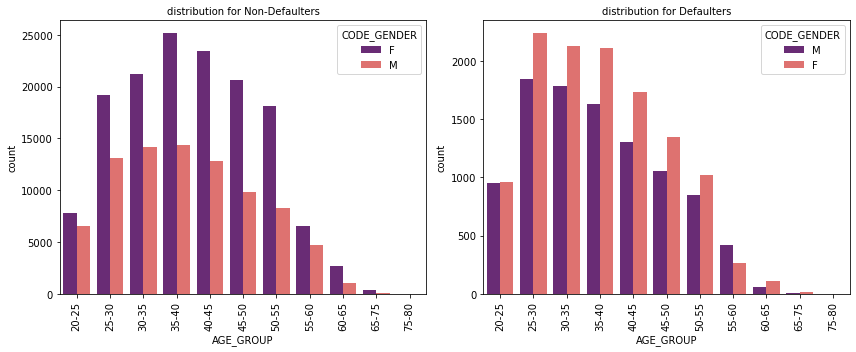

In [45]:
barpl("AGE_GROUP", "CODE_GENDER")

inference: for people within age group of 35-45 are the major loan payers and for people within age group 25-35 are the major defaulters

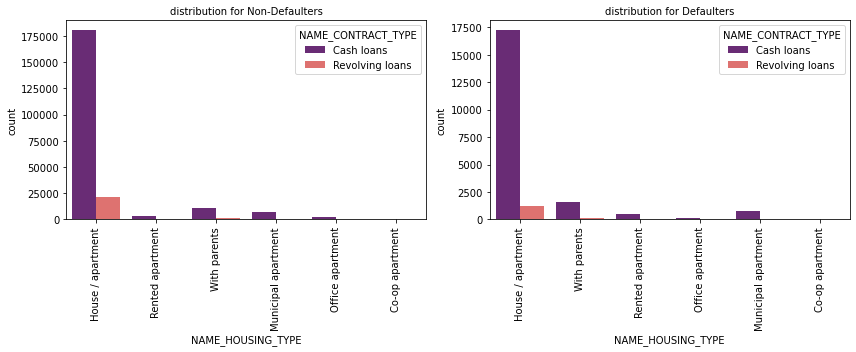

In [46]:
barpl("NAME_HOUSING_TYPE", "NAME_CONTRACT_TYPE")

inference: house /apartment are major loan takers preferred with the form of cash 

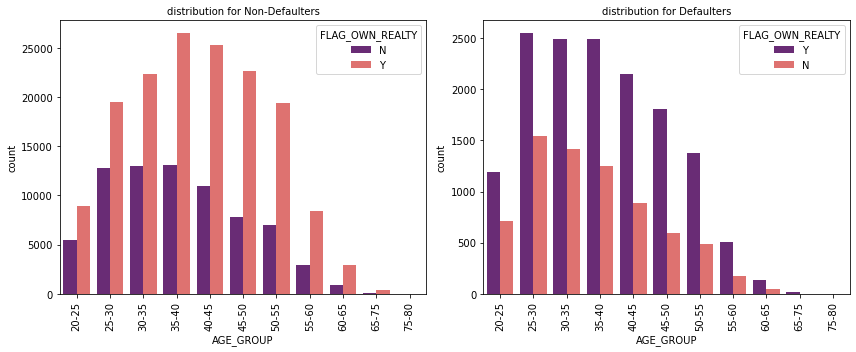

In [47]:
barpl("AGE_GROUP", "FLAG_OWN_REALTY")

inference: people belonging to 35-45 and who are also owning a realty are paying loans regularly and people in the age group of 25-35 who are also owing a realty are major defaulters.

most of the loan takers are realty owners

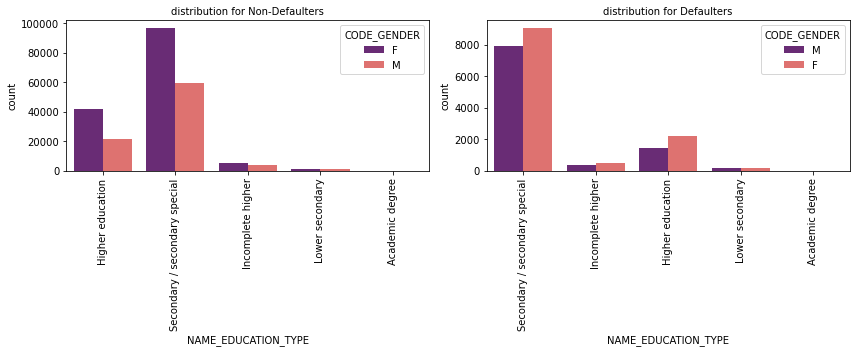

In [48]:
barpl("NAME_EDUCATION_TYPE","CODE_GENDER")

inference:  females belonging to secondary/secondary special have the most count in both the cases 

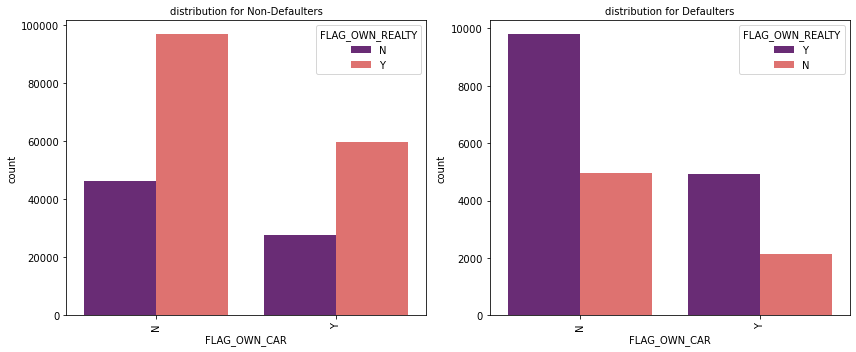

In [49]:
barpl("FLAG_OWN_CAR", "FLAG_OWN_REALTY")

inference: population owning a realty and not owning car are major loan takers 

people owning both are lesser in both the cases

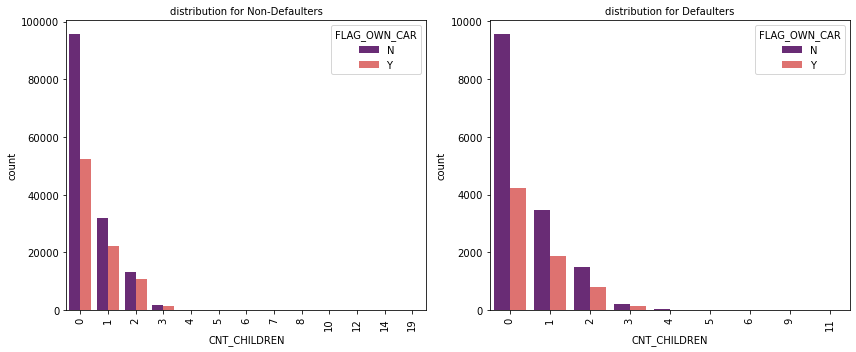

In [50]:
barpl("CNT_CHILDREN", "FLAG_OWN_CAR")

inference: people with no children and are not owning a car are most loan takers in both the cases 

#### previous application:

In [51]:
#reading the previous application file

pdf = pd.read_csv("previous_application.csv")

In [52]:
#inspecting columns in the dataframe

pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [53]:
#Dropping null values

cols = pdf.isnull().mean()>.25

In [54]:
pdf.drop(cols[cols == True].index, axis =1, inplace =True)

In [55]:
#Rechecking null values in the columns after dropping

pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [56]:
#Inspecting the data frame shape

pdf.shape

(1670214, 26)

In [57]:
#creating a new data frame

merged =pd.merge(df, pdf, how='left', on=['SK_ID_CURR'])

In [58]:
#inspecting the merged data frame

merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153787 entries, 0 to 1153786
Data columns (total 57 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1153787 non-null  int64   
 1   TARGET                        1153787 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1153787 non-null  object  
 3   CODE_GENDER                   1153787 non-null  object  
 4   FLAG_OWN_CAR                  1153787 non-null  object  
 5   FLAG_OWN_REALTY               1153787 non-null  object  
 6   CNT_CHILDREN                  1153787 non-null  int64   
 7   AMT_INCOME_TOTAL              1153787 non-null  float64 
 8   AMT_CREDIT_x                  1153787 non-null  float64 
 9   AMT_ANNUITY_x                 1153694 non-null  float64 
 10  AMT_GOODS_PRICE_x             1153787 non-null  float64 
 11  NAME_INCOME_TYPE              1153787 non-null  object  
 12  NAME_EDUCATION

#### bivariate analysis & multivariate analysis to be done 

In [59]:
#funciton for plotting box plots

def boxpl(X, Y, H= None):
    fig, axes= plt.subplots( 1,  2, figsize= (18,7))
    heading= "annuity for age and income groups"
    
    a = sns.boxplot(x = X , y= Y, hue = H, data = t0, ax = axes[0])
    plt.setp(a.xaxis.get_majorticklabels(), rotation=90)
    a.set_title("Non-Defaulters")

    b = sns.boxplot(x = X , y= Y, hue = H, data = t1, ax = axes[1])
    plt.setp(b.xaxis.get_majorticklabels(), rotation=90)
    b.set_title("Defaulters")
    
    plt.show()

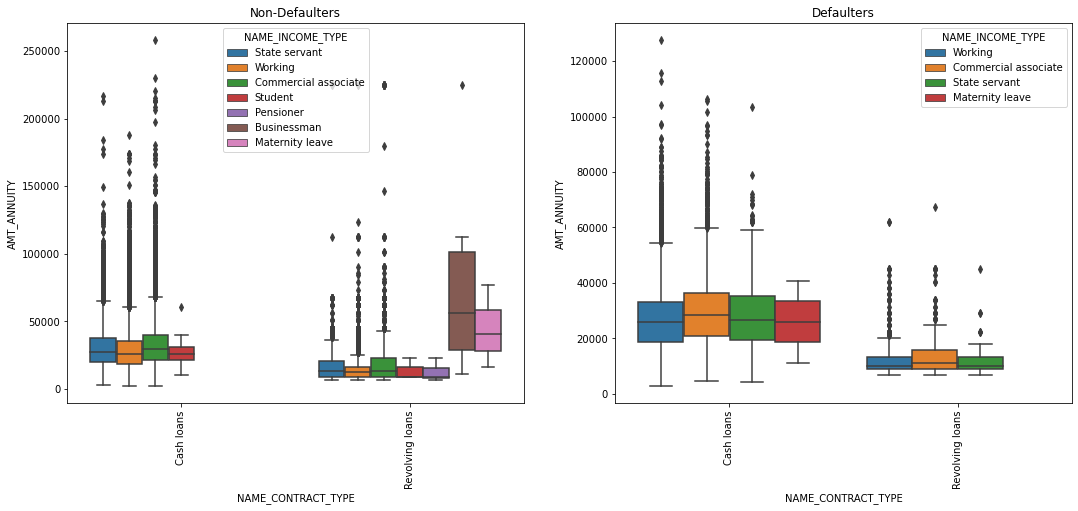

In [60]:
boxpl("NAME_CONTRACT_TYPE", "AMT_ANNUITY", "NAME_INCOME_TYPE")

inference: businessmen are the major loan payers, banks seem to give out a comparitively larger no of loan to thatr particular category.

business are mostly non-defaulters and prefer revolving loans.

most of the distribution businessan taking loans are above the mean.

maternity leave are not comfortable with cash loans.

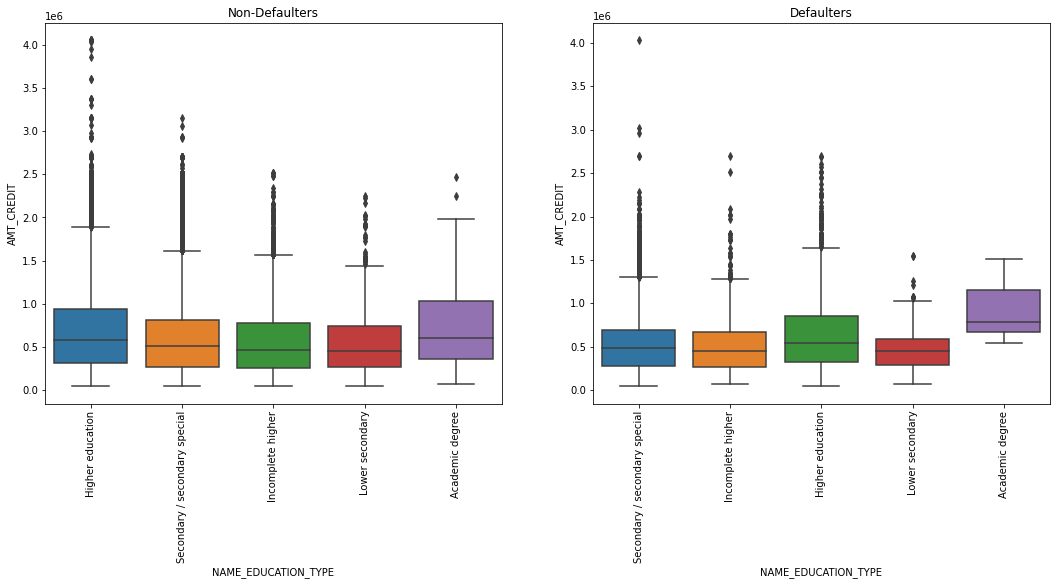

In [61]:
boxpl("NAME_EDUCATION_TYPE", "AMT_CREDIT")

inference: major distribution of academic degree lies above mean and it has lesser no of outliers. Academic degree has larger amount of credit. 

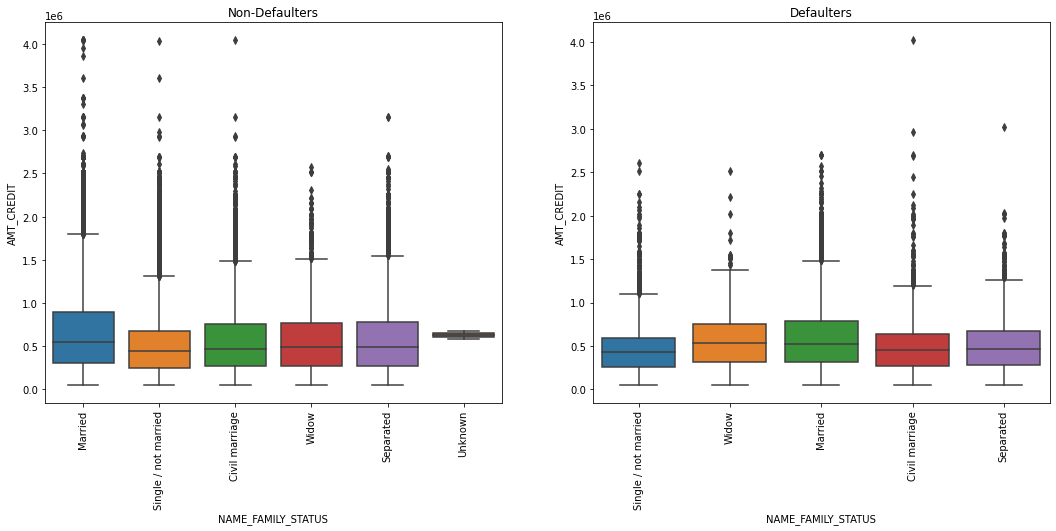

In [62]:
boxpl("NAME_FAMILY_STATUS", "AMT_CREDIT")

inference: married people has more amount of credit in a comman note. large distribution of married people lie above mean.

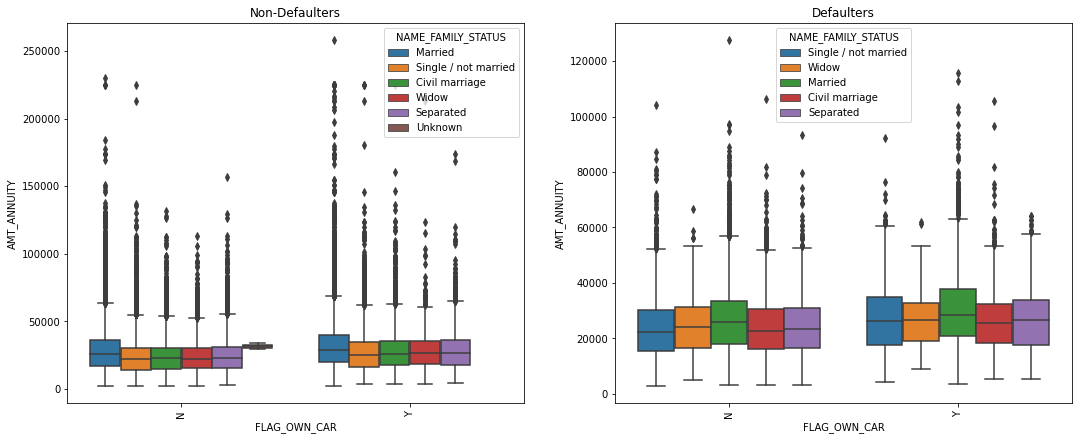

In [63]:
boxpl("FLAG_OWN_CAR", "AMT_ANNUITY", "NAME_FAMILY_STATUS")

inference: married people owning a car tend to be higher in of defaulters. married population also have more outliers.  married people have higher amount of annuity in common note.

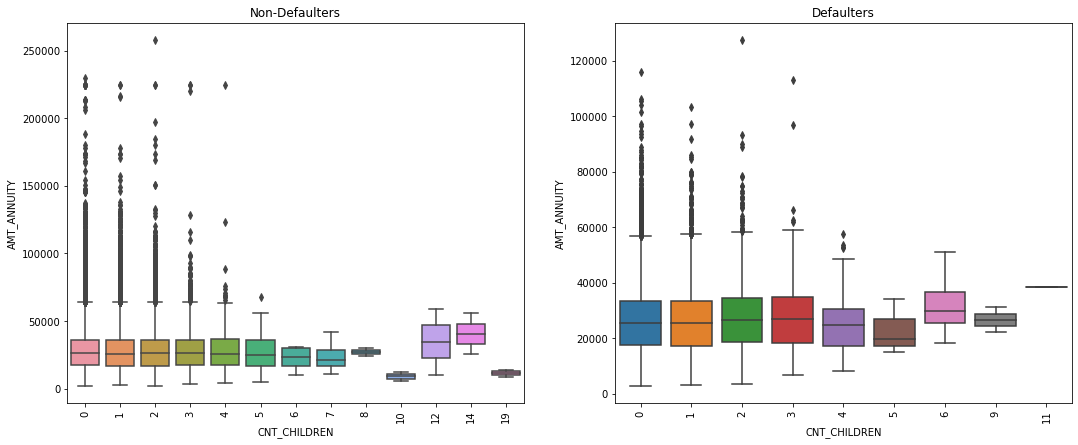

In [64]:
boxpl("CNT_CHILDREN","AMT_ANNUITY")

inference: people having 0-3 children have same pattern of quartile distribution. people having more than 12 children seem to pay loan without difficulty

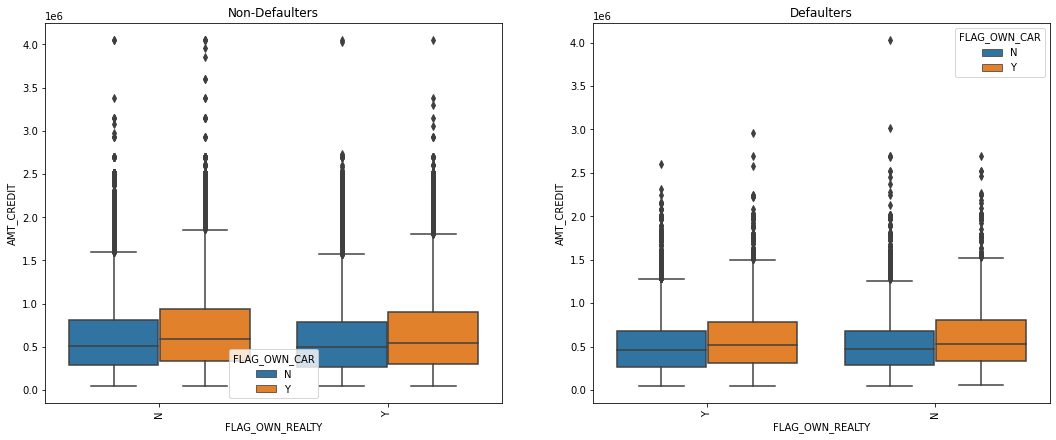

In [65]:
boxpl("FLAG_OWN_REALTY", "AMT_CREDIT","FLAG_OWN_CAR")

inference:people not owning a realty and owning car have higher amount of credit.

In [66]:
#correlation between numeric variables

n_default = t0.corr(method='spearman')
default = t1.corr(method='spearman')

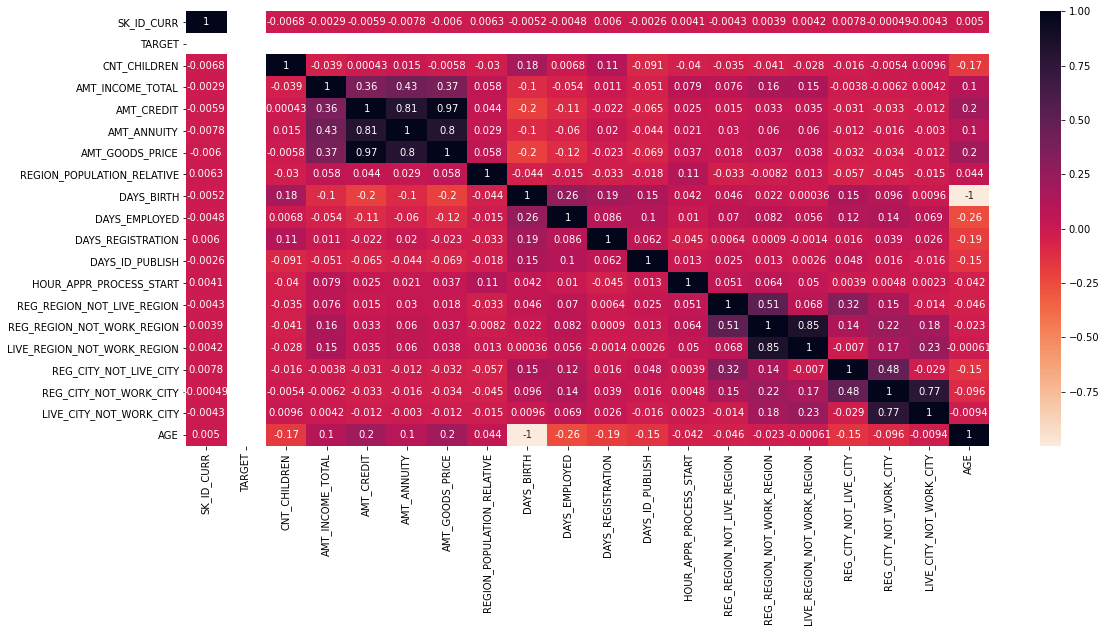

In [67]:

plt.figure(figsize = [18,8])
sns.heatmap(default, annot = True, cmap= "rocket_r")
plt.show()

inference:

+amt credit and amt annuity are proportional and that means increase in credit will also increase in annuity

+people working in crowded places are not earning more

+large credit is offered for higher goods price

+higher income gives higer goods price (proportional)

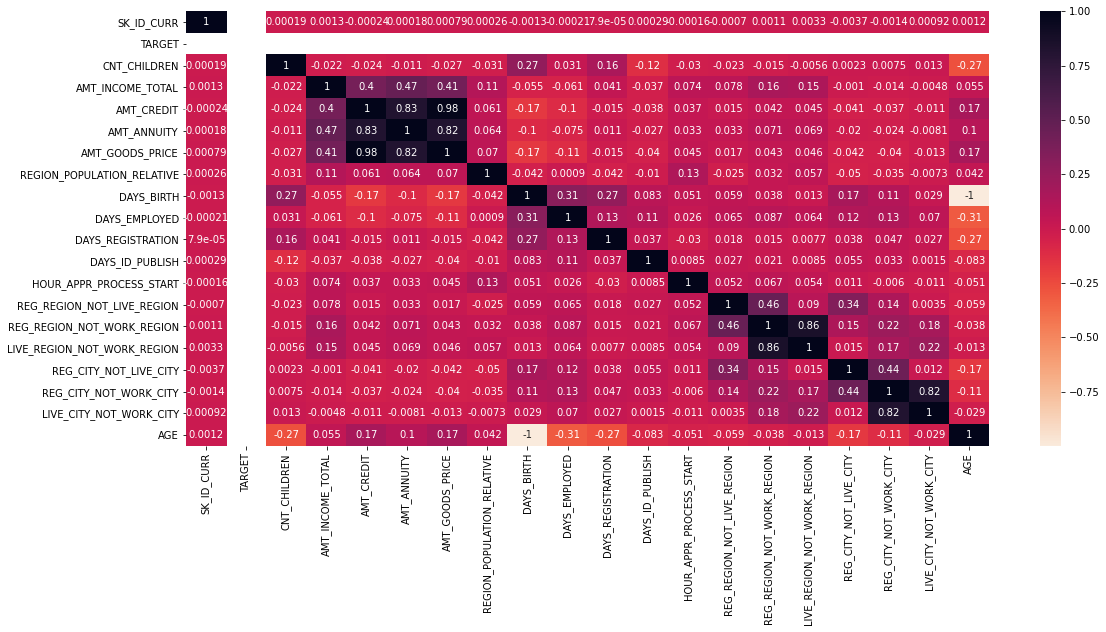

In [68]:
plt.figure(figsize = [18,8])
sns.heatmap(n_default, annot = True, cmap= "rocket_r")

inference:

+amt credit and amt income total are better correlated and by that it states that the higher the income, the higher the credit.

+amt credit and amt annuity are proportional and that means increase in credit will also increase in annuity

+amt credit and amt goods price are better correlated and that states higher credit is taken with much higher valued goods

+total income gets decreased with people residing in crowder areas



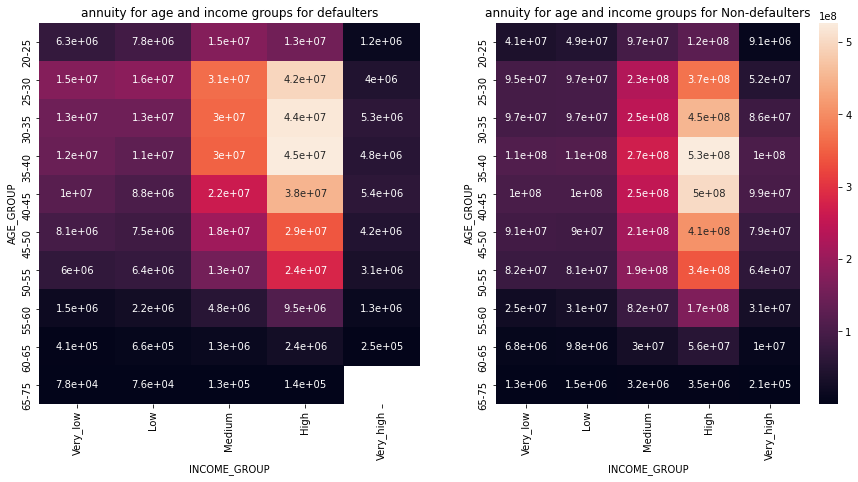

<Figure size 432x288 with 0 Axes>

In [69]:
#Pivot table with rows as income group and columns as age group values as annuity

fig, axes= plt.subplots( 1,  2, figsize= (15,7))
heading= "annuity for age and income groups"

piv = pd.pivot_table(t1,values = "AMT_ANNUITY", index = "AGE_GROUP", columns = "INCOME_GROUP", aggfunc = "sum")
a = sns.heatmap(piv, annot = True, cmap= "rocket", ax =axes[0], cbar= False)
a.set_title(heading + " for defaulters")
plt.setp(a.xaxis.get_majorticklabels(),rotation= 90)

piv1 = pd.pivot_table(t0,values = "AMT_ANNUITY", index = "AGE_GROUP", columns = "INCOME_GROUP", aggfunc = "sum")
b = sns.heatmap(piv1, annot = True, cmap= "rocket", ax =axes[1])
b.set_title(heading + " for Non-defaulters")
plt.setp(b.xaxis.get_majorticklabels(),rotation= 90)

plt.show()
plt.tight_layout()

inference: people belonging to 25-35 age group and are in medium income group, having higher annuity are mostly defaulters.

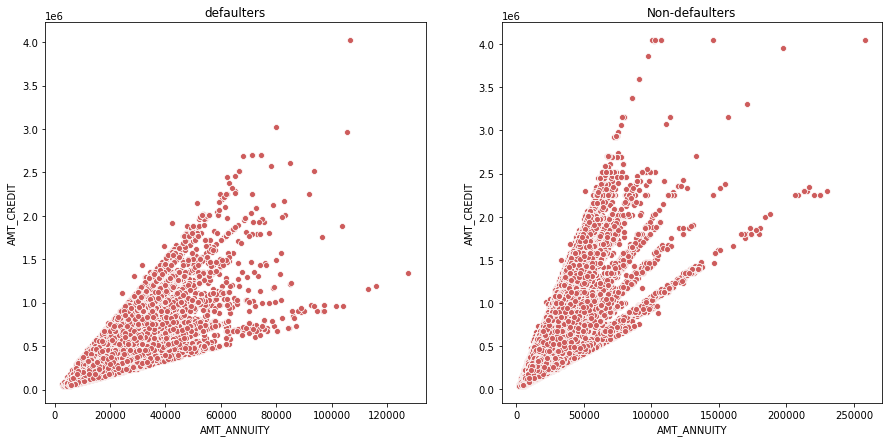

<Figure size 432x288 with 0 Axes>

In [70]:
#Scatter plots for bivariate analysis

fig, axes= plt.subplots( 1,  2, figsize= (15,7))
#heading= ""

a = sns.scatterplot(x= "AMT_ANNUITY", y = "AMT_CREDIT", data = t1, color= "indianred",ax = axes[0])
a.set_title("defaulters")

b = sns.scatterplot(x= "AMT_ANNUITY", y = "AMT_CREDIT", data = t0, color='indianred', ax = axes[1])
b.set_title("Non-defaulters")

plt.show()
plt.tight_layout()

inference: amount of annuity increases with increase in amount of credit.

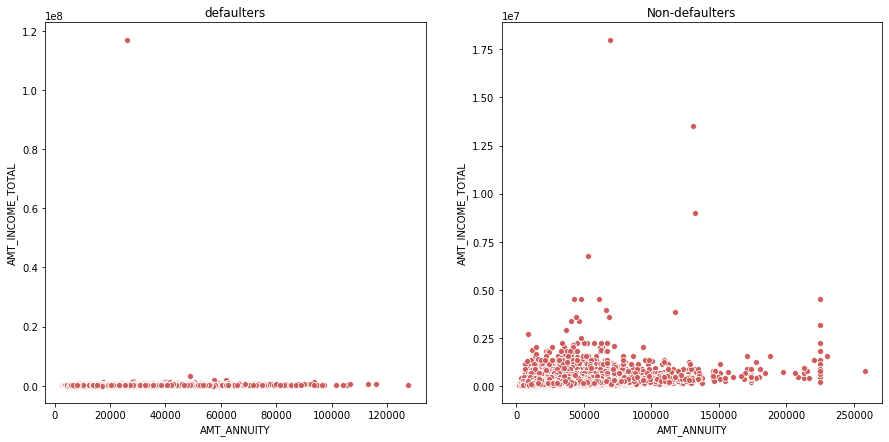

<Figure size 432x288 with 0 Axes>

In [71]:
#Scatter plot for amt annuity and income total

fig, axes= plt.subplots( 1,  2, figsize= (15,7))
#heading= ""

a = sns.scatterplot(x= "AMT_ANNUITY", y = "AMT_INCOME_TOTAL", data = t1, color= "indianred",ax = axes[0])
a.set_title("defaulters")

b = sns.scatterplot(x= "AMT_ANNUITY", y = "AMT_INCOME_TOTAL", data = t0, color='indianred', ax = axes[1])
b.set_title("Non-defaulters")

plt.show()
plt.tight_layout()

inference: amount of income total doesnt increase with amount of annuity, this can also state that due to lower levels of salary higher amount annuity could not be paid  

In [72]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### Univariate analysis for previous application

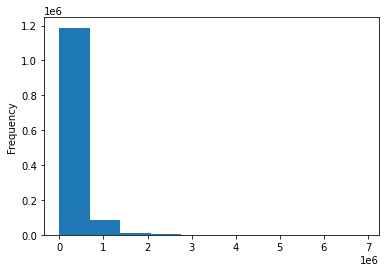

In [73]:
pdf["AMT_GOODS_PRICE"].plot.hist()

inference: the distribution is skewed to the left 

In [76]:
#checking values in each columns

pdf["CHANNEL_TYPE"].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [75]:
pdf["NAME_GOODS_CATEGORY"].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [77]:
#excluding all the data that has XNA in the column

pdf = pdf[~(pdf.NAME_GOODS_CATEGORY == "XNA")]


In [78]:
pdf["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP    719405
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

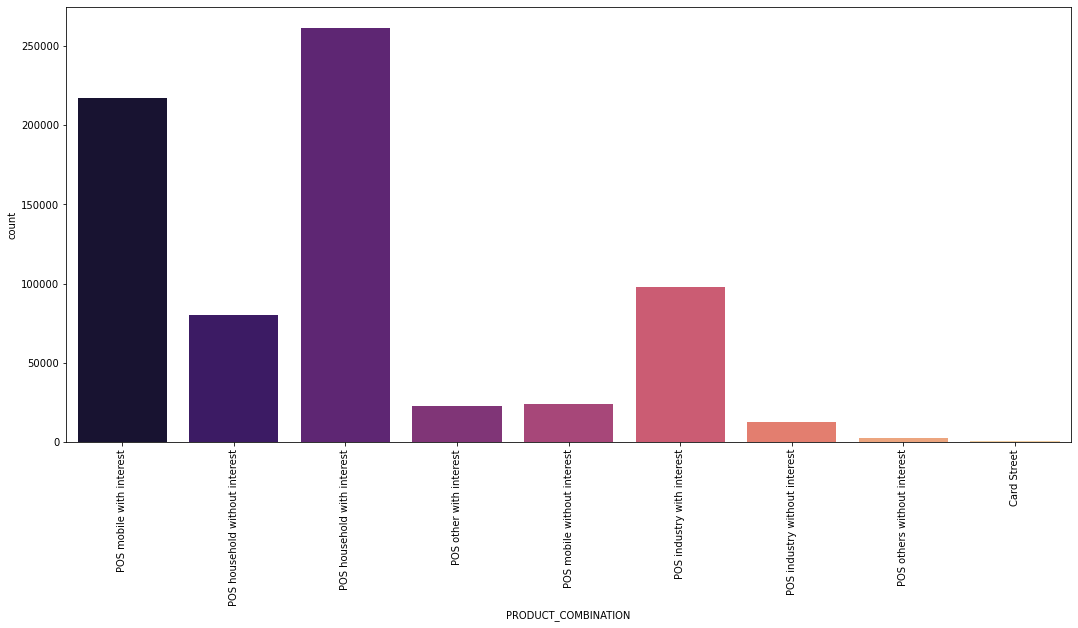

In [79]:

plt.figure(figsize = [18,8])
sns.countplot("PRODUCT_COMBINATION" ,data = pdf, palette = "magma")
plt.xticks(rotation = 90)

plt.show()

inference: POS household with interest are higher in number, whilst card street are lesser in number   

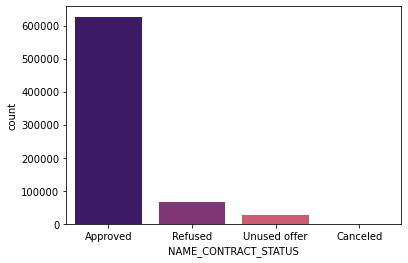

In [80]:
#plotting different column distribution

sns.countplot("NAME_CONTRACT_STATUS", data =pdf , palette = "magma")

inference: this graph shows that most of the applications are being approved

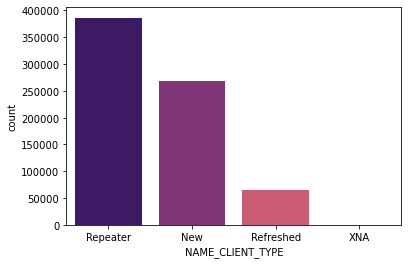

In [81]:
sns.countplot("NAME_CLIENT_TYPE", data =pdf , palette = "magma")

inference: Repeaters are more in number,could be the case that the bank also is interested in giving loans for repeaters.

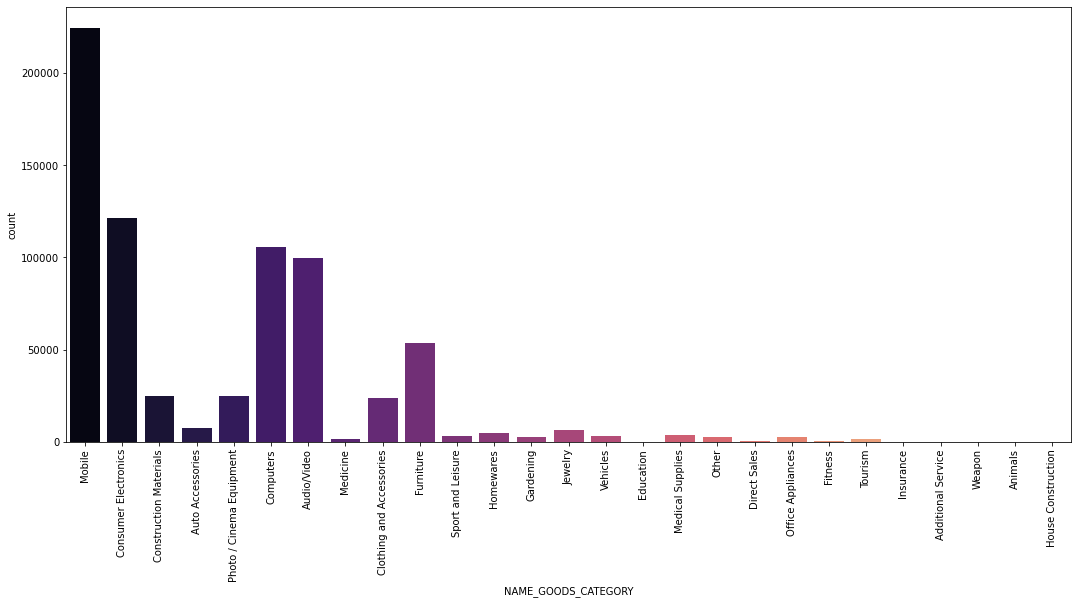

In [82]:
plt.figure(figsize = [18,8])
sns.countplot("NAME_GOODS_CATEGORY" ,data = pdf, palette = "magma")
plt.xticks(rotation = 90)

plt.show()

inference: electronics on genral is the most used category to apply for a loan 

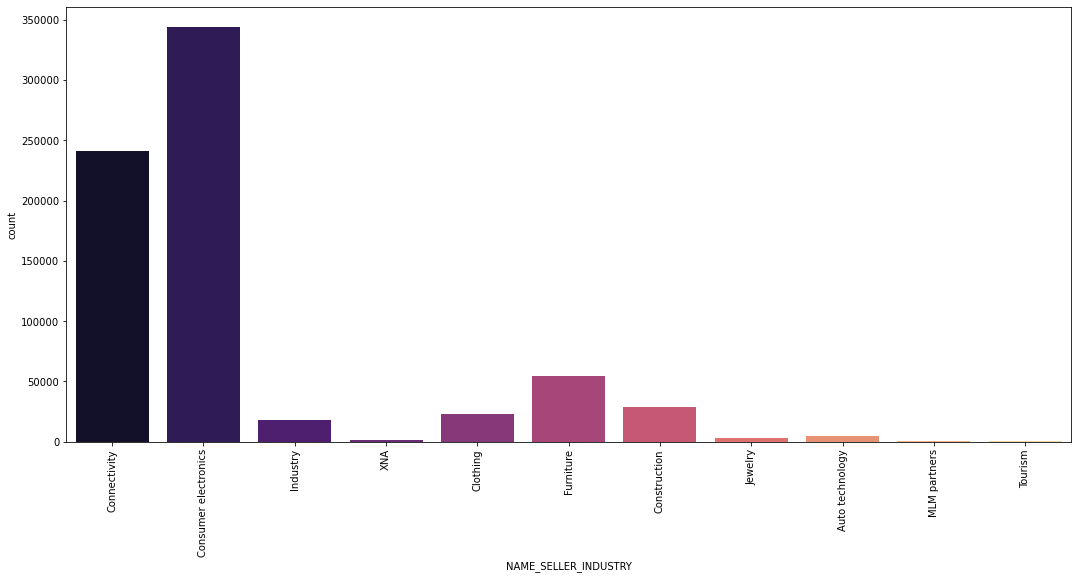

In [83]:

plt.figure(figsize = [18,8])
sns.countplot("NAME_SELLER_INDUSTRY" ,data = pdf, palette = "magma")
plt.xticks(rotation = 90)

plt.show()

inference: the consumer electronics category have higher counts, while tourism have the lowest counts

### Conclusion

1. The ratio of non-defaulters to defaulters seems to be 1:10

 

2. Ladies tend to take loans more than the Gents, especially ladies from education type Secondary/secondary special

 

3. The Business entity type 1 is tending to take more loans that other business categories.The second most common category to take loan is self employed

 

4. Business type tend to pay more annuity and prefer revolving loans

 

5. People who has rented apartment tend to take loans among the other housing type category

 

6. Education type Secondary/secondary special tend to have more income and also take more loans

 

7. People who are employees - working type tend to take more loans than other income type categories

 

8. Married and single people tend to take more loans

 

9. People who already own a property tend to take more loans.Maybe the banks are inclined to provide them loans without much hassles since they have a property to count on if they become defaulters

 

10. Business people tend to take only revolving loans and they are good enough to pay them back too in general

 

11. People generally tend to take loans for electronics and banks also approve them